In [1]:
import statsmodels.formula.api as smf
import wooldridge as woo
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Lecture 5

## Nathan Kunz

In [2]:
ceo = woo.data('ceosal1')
ceo

,salary,pcsalary,sales,roe,pcroe,ros,indus,finance,consprod,utility,lsalary,lsales
0,1095,20,27595.000000,14.1,106.400002,191,1,0,0,0,6.998509,10.225389
1,1001,32,9958.000000,10.9,-30.600000,13,1,0,0,0,6.908755,9.206132
2,1122,9,6125.899902,23.5,-16.299999,14,1,0,0,0,7.022868,8.720281
3,578,-9,16246.000000,5.9,-25.700001,-21,1,0,0,0,6.359574,9.695602
4,1368,7,21783.199219,13.8,-3.000000,56,1,0,0,0,7.221105,9.988894
...,...,...,...,...,...,...,...,...,...,...,...,...
204,930,10,1509.099976,9.0,20.500000,131,0,0,0,1,6.835185,7.319269
205,525,3,1097.099976,15.5,20.100000,72,0,0,0,1,6.263398,7.000426
206,658,32,4542.600098,12.1,-7.800000,68,0,0,0,1,6.489205,8.421255
207,555,6,2023.000000,13.7,-14.600000,60,0,0,0,1,6.318968,7.612337


## Perfect Multicollinearity

In [340]:
ceo_perf = ceo.copy()

# The original sales number is in millions, so here I make this the actual number
ceo_perf["Sales_Actual"] = ceo_perf["sales"]*1000000

In [343]:
badols = smf.ols('np.log(salary) ~sales + Sales_Actual', ceo_perf).fit()
badols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(salary)   R-squared:                       0.079
Model:                            OLS   Adj. R-squared:                  0.075
Method:                 Least Squares   F-statistic:                     17.79
Date:                Thu, 27 Oct 2022   Prob (F-statistic):           3.70e-05
Time:                        20:48:17   Log-Likelihood:                -168.63
No. Observations:                 209   AIC:                             341.3
Df Residuals:                     207   BIC:                             347.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.8467      0.045    152.138      0.000       6.758       6.935
sales         1.498e-17   3.55e-18      4.217      0.000    7.98e-18     2.2e-17
Sales_Actual  1.498e-11   3.55e-12      4.217      0.000    7.98e-12     2.2e-11
==============================================================================
Omnibus:                       57.347   Durbin-Watson:                   1.893
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              205.912
Skew:                           1.063   Prob(JB):                     1.94e-45
Kurtosis:                       7.373   Cond. No.                     7.08e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.69e-22. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## Imperfect Multicollinearity

In [3]:
cors = []
for i in range(10000):
    X = np.random.normal(0, 1, 40)
    sample2 = np.random.normal(0, 1, 40)
    Y = .95*X + np.sqrt(1-.95**2)*sample2
    cors.append(np.corrcoef(X,Y)[0][1])


(array([   4.,    5.,   26.,   62.,  244.,  660., 1792., 3501., 3141.,
         565.]),
 array([0.83889237, 0.85354228, 0.86819219, 0.8828421 , 0.897492  ,
        0.91214191, 0.92679182, 0.94144173, 0.95609164, 0.97074155,
        0.98539145]),
 <BarContainer object of 10 artists>)

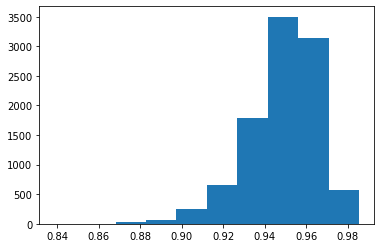

In [4]:
plt.hist(cors)

In [5]:
np.median(cors)

0.9513619945529976

In [6]:
# creating two normal random variables with a correlation of .95

# X has mean 0 and sd of 1
X = np.random.normal(0, 1, 40)

# create an uincorrelated random variable
sample2 = np.random.normal(0, 1, 40)

# Use x and sample2 to build a variable (Y) that is correlated with X
Y = .95*X + np.sqrt(1-.95**2)*sample2

# As N->inf X and Y will tend to have a correlation of rho = .95 
np.corrcoef(X,Y)

array([[1.        , 0.95139425],
       [0.95139425, 1.        ]])

In [7]:
# create a new variable Z = 1*x +1*Y + e
Z = X + Y + np.random.normal(0, 1, 40)

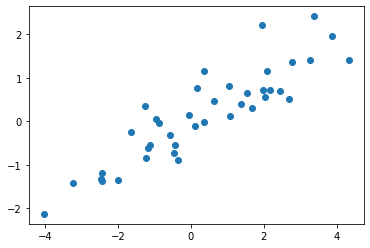

In [8]:
plt.scatter(Z, X)

In [9]:
# Pulling the variables into a dataframe
synthdata = pd.DataFrame(np.array([Z, X, Y]).T, columns = ['Z', 'X', 'Y'])
synthdata.head()

,Z,X,Y
0,-1.257177,0.349939,0.316985
1,-0.448125,-0.724857,-0.680231
2,0.630467,0.473446,-0.035037
3,0.354891,1.164088,1.296980
4,1.982668,0.720593,0.830124


In [10]:
results = smf.ols('Z ~ X + Y', synthdata).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Z   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     71.25
Date:                Wed, 26 Oct 2022   Prob (F-statistic):           2.05e-13
Time:                        21:14:22   Log-Likelihood:                -53.088
No. Observations:                  40   AIC:                             112.2
Df Residuals:                      37   BIC:                             117.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0766      0.152      0.504      0.617      -0.231       0.385
X              1.5970      0.470      3.400      0.002       0.645       2.549
Y              0.1467      0.507      0.290      0.774      -0.880       1.173
==============================================================================
Omnibus:                        0.977   Durbin-Watson:                   2.125
Prob(Omnibus):                  0.613   Jarque-Bera (JB):                0.929
Skew:                          -0.342   Prob(JB):                        0.629
Kurtosis:                       2.702   Cond. No.                         6.52
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Variance Inflation Factor (VIF)

In [353]:
# manual calculation
aux_Y = smf.ols('Y~X', data = synthdata).fit()
1/(1-aux_Y.rsquared)

10.543076605855383

In [355]:
import patsy as pt
import statsmodels.stats.outliers_influence as smo

# Get the design matrix
y, X = pt.dmatrices('Z ~ X + Y', data = synthdata,
                   return_type = 'dataframe')

X.head()

,Intercept,X,Y
0,1.0,0.349939,0.316985
1,1.0,-0.724857,-0.680231
2,1.0,0.473446,-0.035037
3,1.0,1.164088,1.296980
4,1.0,0.720593,0.830124


In [319]:
#  Pull the number of regressors (+ intercept)
k = X.shape[1]

# create an empty matrix to store results
VIF = np.empty(k)

# Loop for each regressor (+ intercept)
for i in range(k):
    
    # calculate the VIF for each
    VIF[i] = smo.variance_inflation_factor(X.values, i)

print('VIF:', VIF)

VIF: [ 1.02676983 10.54307661 10.54307661]


### Multicollinearity with Higher Order Variables

In [46]:
synthdata['Z2'] = X + X**2 +X**3 + np.random.normal(0,5, 40)

In [362]:
np.corrcoef(synthdata["X"]**3, synthdata["X"]**2)

array([[1.       , 0.4666816],
       [0.4666816, 1.       ]])

In [47]:
results1 = smf.ols('Z2 ~ X + I(X**2) + I(X**3)', synthdata).fit()
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     Z2   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     11.80
Date:                Wed, 26 Oct 2022   Prob (F-statistic):           1.57e-05
Time:                        21:15:55   Log-Likelihood:                -124.88
No. Observations:                  40   AIC:                             257.8
Df Residuals:                      36   BIC:                             264.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.6111      1.207     -0.506      0.616      -3.059       1.837
X              1.6622      1.682      0.988      0.330      -1.749       5.074
I(X ** 2)      1.2609      0.760      1.659      0.106      -0.281       2.803
I(X ** 3)      0.8160      0.531      1.537      0.133      -0.261       1.893
==============================================================================
Omnibus:                        7.833   Durbin-Watson:                   2.105
Prob(Omnibus):                  0.020   Jarque-Bera (JB):                7.484
Skew:                          -0.683   Prob(JB):                       0.0237
Kurtosis:                       4.621   Cond. No.                         7.60
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
# this model is misspecified and our estiamte of the coefficient
# on X is biased
results2 = smf.ols('Z2 ~ X', synthdata).fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     Z2   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.344
Method:                 Least Squares   F-statistic:                     21.44
Date:                Wed, 26 Oct 2022   Prob (F-statistic):           4.18e-05
Time:                        21:16:05   Log-Likelihood:                -129.62
No. Observations:                  40   AIC:                             263.2
Df Residuals:                      38   BIC:                             266.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7717      1.016      0.760      0.452      -1.285       2.828
X              4.4788      0.967      4.631      0.000       2.521       6.437
==============================================================================
Omnibus:                        5.947   Durbin-Watson:                   2.212
Prob(Omnibus):                  0.051   Jarque-Bera (JB):                4.890
Skew:                          -0.588   Prob(JB):                       0.0867
Kurtosis:                       4.245   Cond. No.                         1.18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

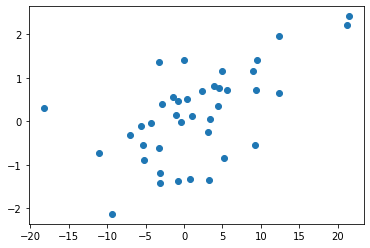

In [49]:
plt.scatter(synthdata['Z2'], synthdata['X'])

## Running an F-Test

In [50]:
# write each of your hypotheses in a list
hypotheses = ['X = 0', "I(X ** 2) = 0", "I(X ** 3) = 0"]

# use the f-test method included in sm.ols().fit() objects
results1.f_test(hypotheses)             

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=11.797252124012763, p=1.5688628957854124e-05, df_denom=36, df_num=3>

## Interactions

In [109]:
# generate an indicator variable
I =  np.random.choice([0,1], 40, p =  [.3, .7])

In [363]:
I

array([1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0])

In [129]:
synthdata["IND"] = I

# create a dependent variable
synthdata['Z3'] = .6*I + .1*X + .5*I*X + np.random.normal(0,1, 40)

In [130]:
results3 = smf.ols('Z3 ~ IND*X', synthdata).fit()
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     Z3   R-squared:                       0.211
Model:                            OLS   Adj. R-squared:                  0.145
Method:                 Least Squares   F-statistic:                     3.213
Date:                Wed, 26 Oct 2022   Prob (F-statistic):             0.0342
Time:                        21:28:44   Log-Likelihood:                -54.743
No. Observations:                  40   AIC:                             117.5
Df Residuals:                      36   BIC:                             124.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1621      0.347     -0.467      0.643      -0.866       0.542
IND            0.7425      0.404      1.838      0.074      -0.077       1.562
X              0.1163      0.281      0.414      0.682      -0.454       0.686
IND:X          0.4777      0.360      1.329      0.192      -0.252       1.207
==============================================================================
Omnibus:                        2.733   Durbin-Watson:                   1.918
Prob(Omnibus):                  0.255   Jarque-Bera (JB):                2.172
Skew:                           0.571   Prob(JB):                        0.338
Kurtosis:                       2.969   Cond. No.                         4.65
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [131]:
hypotheses = ['X = 0', 'IND:X = 0']
results3.f_test(hypotheses)          

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=3.592673978535451, p=0.03779108809418408, df_denom=36, df_num=2>

### Predictor Transformations

In [139]:
results3 = smf.ols('np.log(salary) ~ np.log(sales) + roe+ consprod', ceo).fit()
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(salary)   R-squared:                       0.299
Model:                            OLS   Adj. R-squared:                  0.289
Method:                 Least Squares   F-statistic:                     29.18
Date:                Thu, 27 Oct 2022   Prob (F-statistic):           9.38e-16
Time:                        14:03:51   Log-Likelihood:                -140.08
No. Observations:                 209   AIC:                             288.2
Df Residuals:                     205   BIC:                             301.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         4.3994      0.292     15.092      0.000       3.825       4.974
np.log(sales)     0.2726      0.033      8.271      0.000       0.208       0.338
roe               0.0139      0.004      3.243      0.001       0.005       0.022
consprod          0.1799      0.080      2.247      0.026       0.022       0.338
==============================================================================
Omnibus:                       88.344   Durbin-Watson:                   2.054
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              449.495
Skew:                           1.573   Prob(JB):                     2.47e-98
Kurtosis:                       9.459   Cond. No.                         183.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [145]:
prestige = pd.read_csv("Prestige_miss.csv")
fit2 = smf.ols('prestige ~ income +education + women', prestige).fit()

In [146]:
fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               prestige   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     112.4
Date:                Thu, 27 Oct 2022   Prob (F-statistic):           4.66e-28
Time:                        14:12:13   Log-Likelihood:                -275.70
No. Observations:                  81   AIC:                             559.4
Df Residuals:                      77   BIC:                             569.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.0977      3.334     -1.229      0.223     -10.737       2.542
income         0.0011      0.000      3.786      0.000       0.001       0.002
education      4.1686      0.396     10.534      0.000       3.381       4.957
women         -0.0292      0.032     -0.916      0.362      -0.093       0.034
==============================================================================
Omnibus:                        0.245   Durbin-Watson:                   1.794
Prob(Omnibus):                  0.885   Jarque-Bera (JB):                0.406
Skew:                           0.102   Prob(JB):                        0.816
Kurtosis:                       2.719   Cond. No.                     3.40e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.4e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

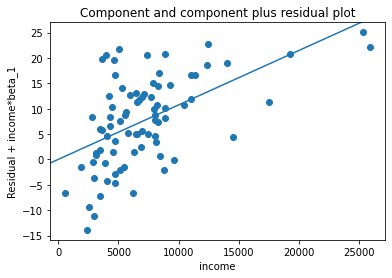

In [150]:
import statsmodels.api as sm
sm.graphics.plot_ccpr(fit2, 'income')

plt.show()

In [180]:
def ccpr_plot(model, data, variable):
    df_copy = data.copy()
    
    df_copy["epartial"] = model.resid + model.params[variable]*data[variable]
    
    plt.figure(figsize = (10, 6))
    
    sns.regplot(x = variable, y = "epartial", data =df_copy, lowess = True)
    sns.regplot(x = variable, y = "epartial", data =df_copy)
    
    plt.title("Component + Residuals "+variable)
    

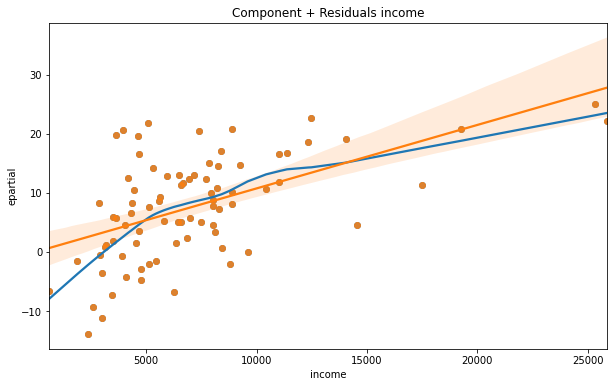

In [181]:
ccpr_plot(fit2, prestige, "income")

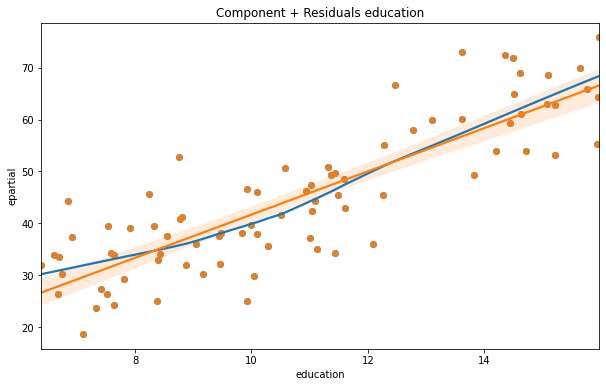

In [182]:
ccpr_plot(fit2, prestige, "education")

<AxesSubplot:title={'center':'CERES residuals plot'}, xlabel='income', ylabel='Component plus residual'>

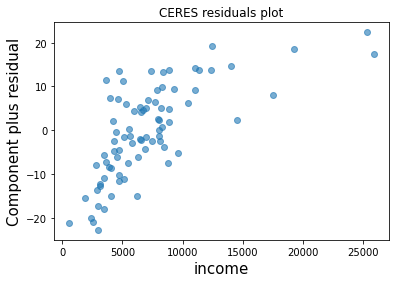

In [221]:
## Ceres
from statsmodels.graphics.regressionplots import plot_ceres_residuals
l = plot_ceres_residuals(fit2, 'income')
plt.gca()

In [228]:
len(X)

40

In [303]:
def ceres_plot(model, data, variable):
    
    # produce plot
    plot_ceres_residuals(fit2, variable)
    ax = plt.gca()
    
    # don't show plot in notebook
    plt.close()
    
    # Pull datapoints from scatterplot from the statsmodels plot
    line = ax.lines[0]
    X = line.get_xdata()
    Y = line.get_ydata()
    
    # Store the results into format that works with seaborn
    df = pd.DataFrame(np.array([X,Y]).T, columns = [variable, "CERES Resdiduals"])
    plt.figure(figsize = (10, 6))
    
    # plot the results in a way similar to R
    sns.regplot(x = variable, y = "CERES Resdiduals", data =df, lowess = True)
    sns.regplot(x = variable, y = "CERES Resdiduals", data =df)
    
    plt.title("CERES Plot "+variable)

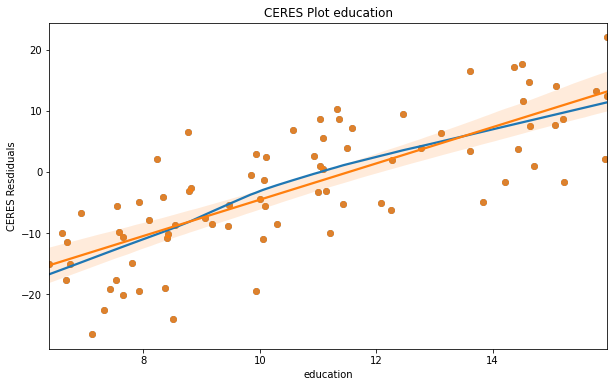

In [307]:
fit3 = smf.ols('prestige~income+education+type', prestige).fit()
ceres_plot(fit3, prestige, 'education')

### Functional Form misspecification

In [330]:
# Create our suspect model
results1 = smf.ols('Z2 ~ X', synthdata).fit()

In [335]:
# Take the fitted values up to the desired power
synthdata["fitted2"] = results1.fittedvalues**2
synthdata["fitted3"] = results1.fittedvalues**3

# Fit regression on polynomial
ramseyreg = smf.ols('Z2 ~ X + fitted2 + fitted3', synthdata).fit()

# run ftest on polynomial values
hypotheses = ['fitted2 = 0', "fitted3 = 0"]

# we reject the null that the functional form is adequate
ramseyreg.f_test(hypotheses)     

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=4.818604895089585, p=0.013986256771061925, df_denom=36, df_num=2>

In [364]:
# statsmodels method
reset_out = smo.reset_ramsey(res = results1, degree = 3)
reset_out

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=4.818604895089885, p=0.01398625677105865, df_denom=36, df_num=2>